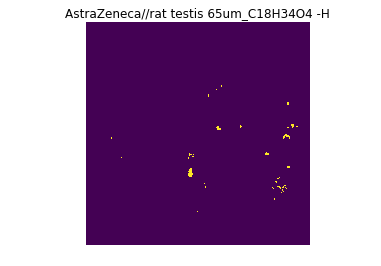

In [2]:
# SET SUMFORMULA NAME, ADDUCT, DATASET for selecting the region
sf_name = 'C18H34O4'
add_name = '-H'
ds_name = 'AstraZeneca//rat testis 65um'

# model param : tfidf or lsi
model = "tfidf"
# quantile param
q = 90.
# ion intensity threshold param (-1 = above quantile)
i = 300000

import os
# base dir
base_dir = '/home/katya/Projects/Metabol/'

c_file = os.path.join(base_dir,'corpora/pixel_'+model+'.mm')

pix_ann_dir = os.path.join(base_dir,'pixel-annotations/45_selected/')

sf_file = os.path.join(pix_ann_dir,'sf_df.msgpack')
dp_file = os.path.join(pix_ann_dir,'ds_pix_cord.msgpack')
dsf_file = os.path.join(pix_ann_dir,'ds_ion_int.msgpack')

import sys  
sys.path.append(base_dir)

import select_region
from select_region import sfname2index

ion_id = sfname2index(sf_file, sf_name, add_name)

from datetime import datetime
from select_region import select_region, viz_region

pixel_ids = select_region(dsf_file, ds_name, ion_id, q, i)
viz_region(dp_file, pixel_ids, ds_name, sf_name+' '+add_name, None)

In [3]:
import gensim
from gensim import corpora
import numpy

corpus = gensim.corpora.MmCorpus(c_file)

ions2values = {}
for pix_id in pixel_ids:
    for (ion_id,value) in corpus[pix_id]:
        if not ion_id in ions2values: ions2values[ion_id] = []
        ions2values[ion_id].append(value)

ions2average = []
for ion_id in ions2values:
    for i in range(0, len(pixel_ids) - len(ions2values[ion_id])): ions2values[ion_id].append(0)
    ions2average.append((ion_id, numpy.mean(ions2values[ion_id])))
ions2average.sort(key=lambda x: x[1],reverse=True)

1165


In [8]:
# THRESHOLD FOR MOST CHARACTRISTIC IONS
t = 0.005
# NUMBER OF MOST CHARACTRISTIC IONS
n = 100

import pandas as pd
ion_df = pd.read_msgpack(sf_file)

counter = 0
for (ion_id,value) in ions2average:
    if counter == n or value<t: break
    counter+=1
    print('%s %s: %f' % (ion_df.at[ion_id,'sf'], ion_df.at[ion_id,'adduct'], value))

C22H34O2 -H: 0.503503
C25H40O4 +Cl: 0.261874
C16H32O2 -H: 0.234683
C18H34O4 -H: 0.233086
C18H36O2 -H: 0.203565
C24H38O2 -H: 0.138094
C18H34O2 -H: 0.116761
C40H80N2O6P +Cl: 0.109379
C47H83O13P -H: 0.106965
C20H32O2 -H: 0.104638
C22H36O2 -H: 0.104279
C13H25NO3 -H: 0.102096
C17H28O3S -H: 0.101567
C18H30O3S -H: 0.100347
C34H67NO3 +Cl: 0.099911
C24H40O2 -H: 0.097225
C28H46O2 -H: 0.093795
C41H74NO8P -H: 0.093147
C22H42O2 -H: 0.078669
C41H70O5 +Cl: 0.076148
C27H44O4 +Cl: 0.071914
C43H78NO7P -H: 0.068941
C44H80NO8P +Cl: 0.068466
C47H72O5 +Cl: 0.064921
C44H76NO10P -H: 0.063159
C36H71NO3 +Cl: 0.059895
C43H76NO7P -H: 0.058275
C43H76NO8P -H: 0.056272
C46H82NO8P +Cl: 0.051231
C48H76NO10P -H: 0.050311
C18H36O3 -H: 0.046779
C18H32O2 -H: 0.043841
C25H42O4 +Cl: 0.041813
C45H79O13P -H: 0.041591
C43H78NO8P -H: 0.039906
C42H82NO8P +Cl: 0.039047
C26H42O2 -H: 0.037508
C30H50O2 -H: 0.036860
C41H79O13P -H: 0.036529
C23H38O4 +Cl: 0.035033
C41H74NO7P -H: 0.034488
C43H72O5 +Cl: 0.034336
C42H74NO10P -H: 0.029311
